# Exercise 2 - Polynomial Regression

In this exercise you will learn about a new type of regression - the polynomial regression. With polynomial regression it is possible to fit a nonlinear relationship between the dependent and the independent variables, although the problem of estimating the parameters is linear and can be solved with the standard linear regression approach.

The idea here is to learn a bunch of (polynomial) models on the same data set and explore the meaning of over- and underfitting the data.

In a second part, we will use Leave One Out Crossvalidation to find a good regularization parameter on the Boston Housing dataset.

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de

### Submission
- Deadline of submission:
        26.04.23 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=43681)


### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

## Dataset
We now have a new dataset saved as `train.npy`.

### Task 1
Load this Dataset using the [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) function.

In [536]:
# TODO: load train.npy
import numpy as np

# Load the dataset
data = np.load('train.npy')

Columns of the dataset represent the variables. Let `X` be the explanatory variable in the first column and `Y` be the variable we want to predict in the second column. 

### Task 2
Visualize the data with a scatterplot of `X` against `Y`.

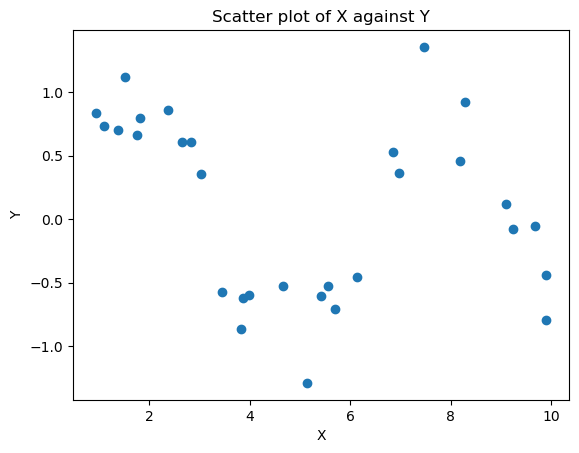

In [537]:
# TODO: scatter plot the data
import matplotlib.pyplot as plt

# Extract X and Y from the dataset
X = data[:, 0]
Y = data[:, 1]

# Create a scatter plot of X against Y
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X against Y')
plt.show()


## Polynomial Regression
As you can see, the relationship between the dependent variable and the explanatory one does not seem to be linear and the standard linear regression from the lecture will not perform well. One way to account for such a non linear relationship is called [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression). For a scalar explanatory variable `X` and a scalar dependent variable `Y`, the data generation model is:

$$
Y = \theta_0 + \theta_1 * X + \theta_2 X^2 + \dots + \theta_d X^d  + \epsilon = \sum_{j=0}^d \theta_j X^j + \epsilon
$$
where $d$ is called degree. Similar to linear regression, we assume $\varepsilon$ to be standard normal distributed noise.

Although the relationship between the dependent and the explanatory variable is non linear, the problem of estimating the parameters $\theta$ is linear. By vectorizing the model, this becomes obvious:

$$
\begin{bmatrix}
    Y_1 \\
    Y_2 \\
    \vdots \\
    Y_n
\end{bmatrix}
=
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots \\
    \theta_d
\end{bmatrix}^T
\begin{bmatrix}
    1 & 1 & \dots & 1\\
    X_1 & X_2 & \dots & X_n\\
    \vdots&\vdots&\vdots&\vdots\\
    X_1^d & X_2^d &\dots & X_n^d
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
\end{bmatrix}
$$

This linear model can now be fit with the linear regression approach. 

### Task 3
Implement a function `poly` to create the design matrix for the polynomial regression. 

Verify the correctness of your implementation!

In [538]:
def poly(X : np.ndarray, degree : int) -> np.ndarray:
    '''
    Creates the polynomial design matrix.
    
    @Params:
        X... array of scalar x
        degree... polynomial degree
        
    @Returns:
        Design matrix
    '''
    
    #TODO: implement
    
    # Initialize an empty matrix with the correct number of rows and columns
    design_matrix = np.zeros((len(X), degree+1))

    # Populate the matrix with the appropriate polynomial terms
    for i in range(degree+1):
        design_matrix[:, i] = X**i

    return design_matrix.T

degree = 2
design_matrix_numpy = np.vander(X.flatten(), degree+1, increasing=True)
design_matrix_poly = poly(X,degree)
print(np.allclose(design_matrix_numpy.T, design_matrix_poly))

True


### Task 4
Implement a class `PolyReg` that fits a polynomial model with ordinary least squares. Regularize your maximum-likelihood problem with ridge regression.

Hint: Recycle the `LinReg` class from the last exercise.

In [539]:
class PolyReg():
    def __init__(self, d : int, c : int = 0):
        '''
        Class for polynomial regression.
        
        @Params:
            d... polynomial degree
            c... parameter for ridge regression
        '''
        # TODO: create attributes d, c, theta 
        self.d = d
        self.c = c
        self.theta = None
    
    def fit(self, X : np.ndarray, Y : np.ndarray):
        '''
        Learns the parameters for a polynomial regression task.
        
        @Params:
            X... array of scalar x (explanatory variable)
            Y... array of scalar y (dependent variable)
        '''
        # TODO: implement
        X = poly(X, self.d)
        self.theta = np.linalg.solve((X @ X.T) + self.c*np.eye(X.shape[0]), X @ Y)
        
    def predict(self, X : np.ndarray) -> np.ndarray:
        '''
        Using learned parameters, predicts output for given X.
        
        @Params:
            X... array of scalar x (explanatory variable)
            
        @Returns:
            Y... array of scalar y (dependent variable)
        '''
        # TODO: implement
        X = poly(X, self.d)
        return self.theta @ X

## Visualization
Next we want to fit a series of models of multiple degrees and visualise them alongside the data.

We want to use the following polynomial degrees:

In [540]:
# model degrees
model_degrees = [0, 1, 2, 3, 6, 9, 12, 15, 18, 21]

### Task 5

For each polynomial degree:
1. Learn the polynomial model
2. Plot the data 
3. Plot the regression line

Plot each model in a separate [subplot](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html). Use a scatter plot for the data.

Additionaly experiment what happens if you change the values for the regularization parameter $c$.

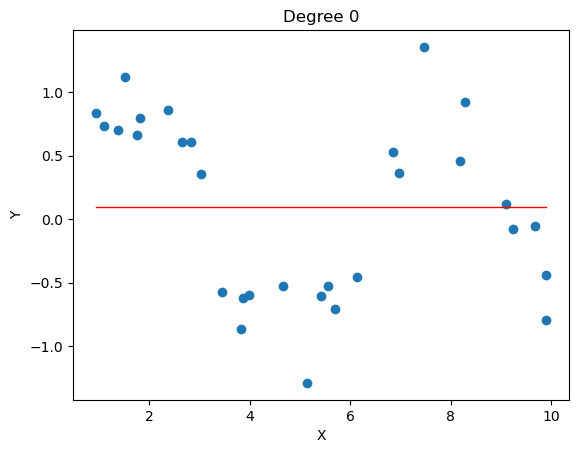

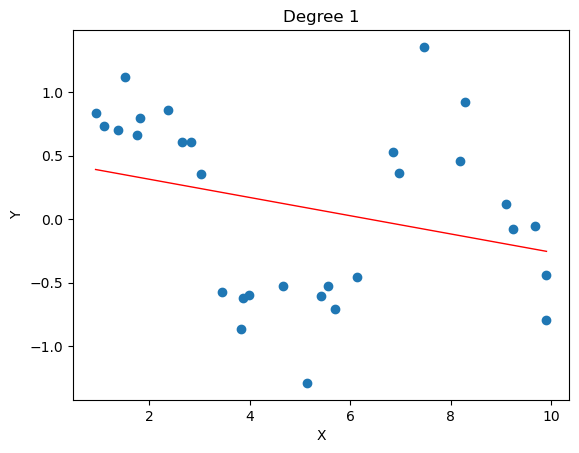

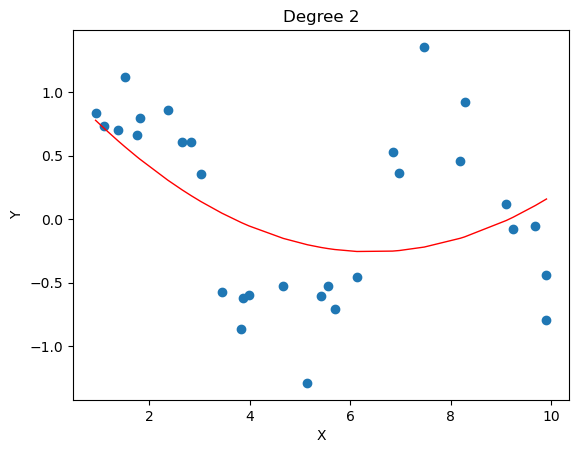

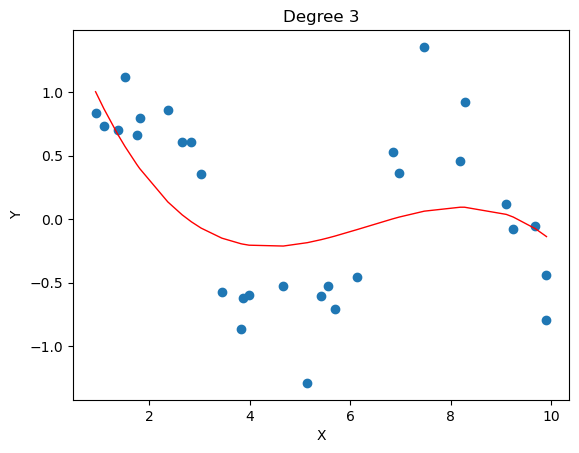

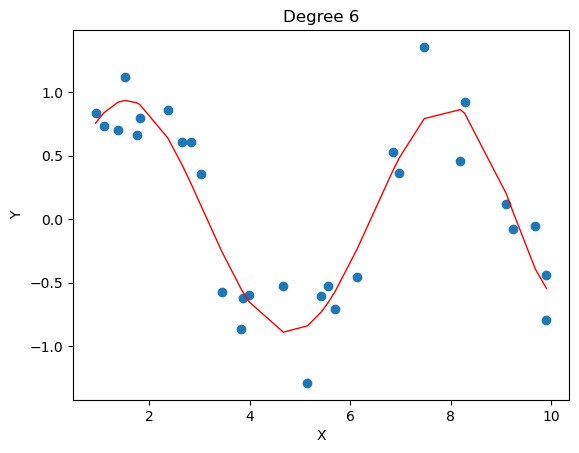

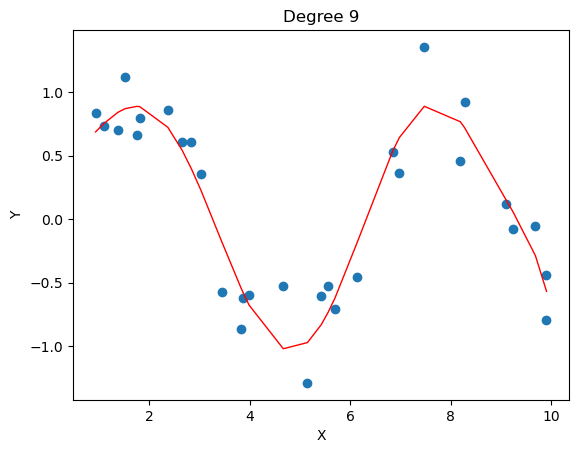

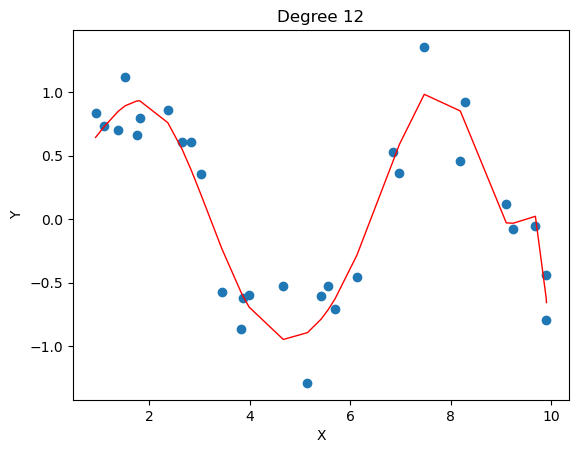

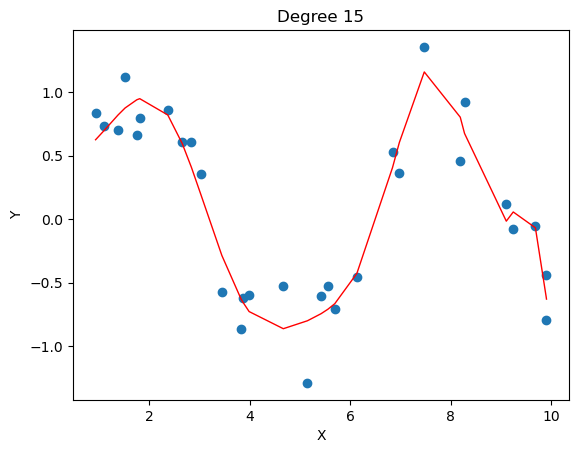

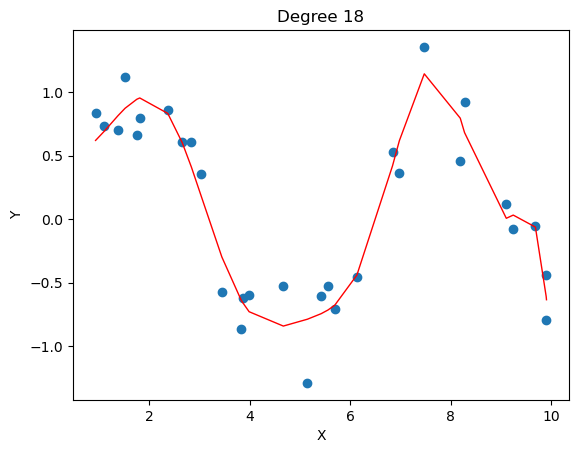

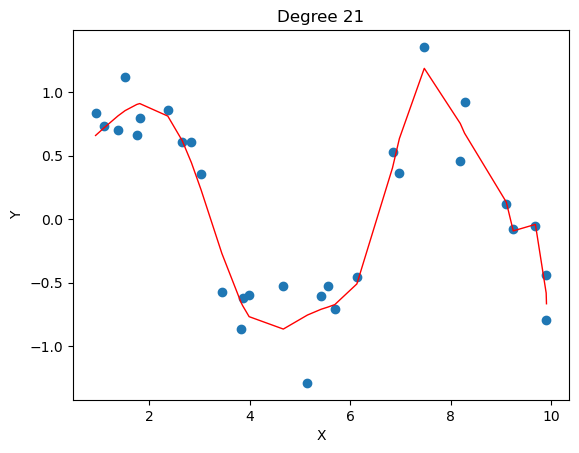

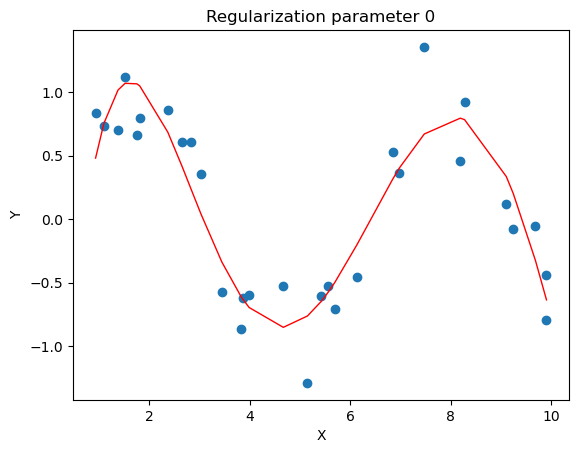

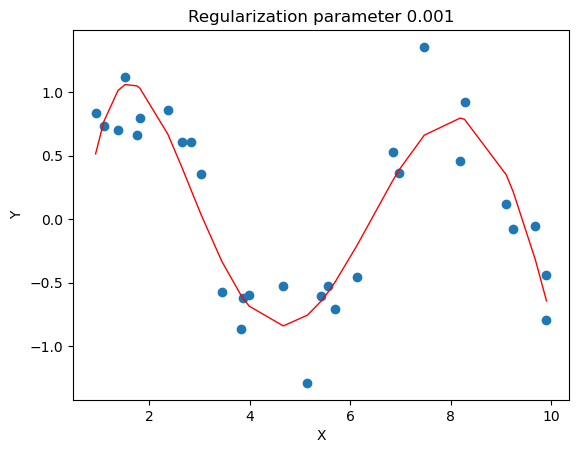

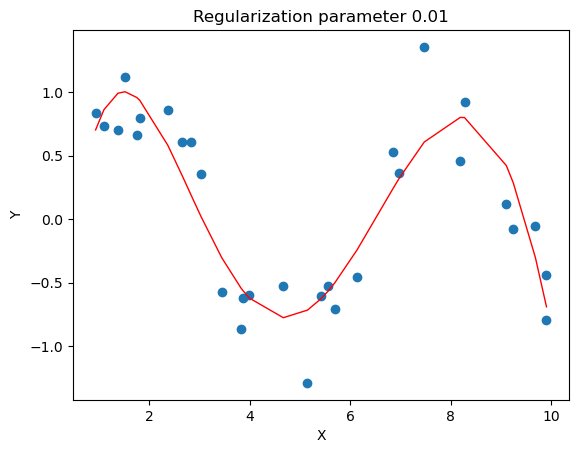

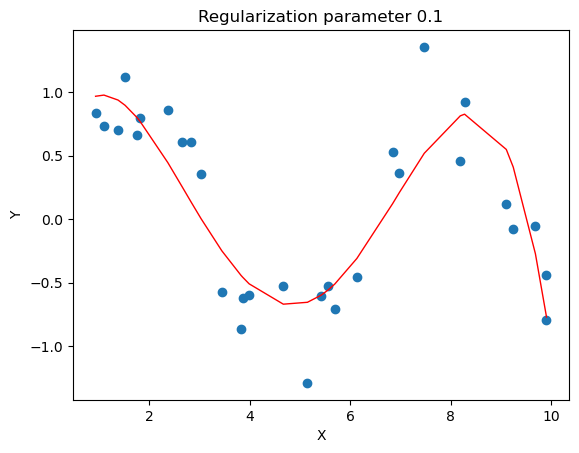

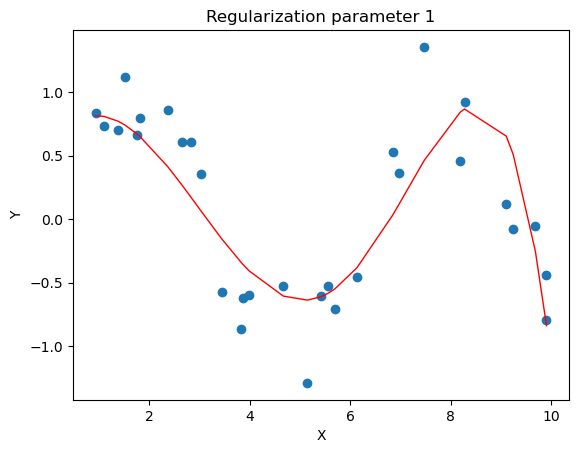

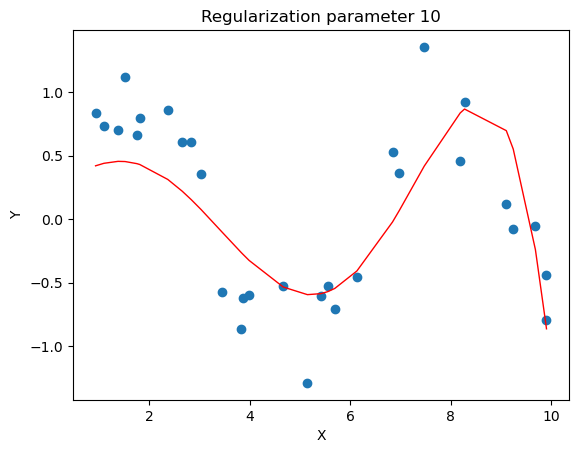

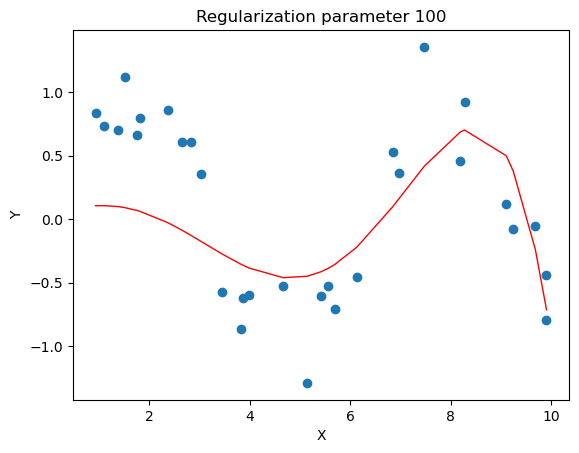

In [541]:
# TODO: Learn models and visualize regression lines
reg = []
for i, degree in enumerate(model_degrees):
    reg.append(PolyReg(degree, 0.3))
    reg[i].fit(X, Y)
    
# TODO: plot data + regression line
for j, mod in enumerate(reg):
    plt.scatter(X, Y)
    plt.plot(X.T, mod.predict(X).flatten(), color='red', linewidth=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Degree '+ str(model_degrees[j]))
    plt.show()

# TODO: What effect does c have on the regression lines?
regularization_params = [0, 0.001, 0.01, 0.1, 1, 10, 100]
reg_c = []

for j, c in enumerate(regularization_params):
    reg_c = PolyReg(5, c)
    reg_c.fit(X, Y)
    plt.scatter(X, Y)
    plt.plot(X.T, reg_c.predict(X).flatten(), color='red', linewidth=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regularization parameter '+ str(regularization_params[j]))
    plt.show()
    
#if c gets too big, the modulation becoming worse
        

## Model Validation
To evaluate the models, we need a measure of fit, that tells us how well the model fits the data. The standard measure for continuously distributed data is the ["root mean squared error" (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation). Given the dependent variable $Y \in \mathbb{R}^n$ and its prediction $\hat{Y} = f(X, \theta) \in \mathbb{R}^n$, the RMSE is defined as:

$$
\text{RMSE}(Y, \hat{Y}) = \sqrt{\frac{1}{n} \sum_{i}^n (Y_i - \hat{Y}_i)^2}
$$

### Task 6
Implement a `rmse` function that returns the RMSE of a vector of observations $Y$ and its predictions $\hat{Y}$

In [542]:
def rmse(Y : np.ndarray, Y_hat : np.ndarray) -> float:
    '''
    Calculates the root means squared error (rmse) of Y and its prediction Y_hat.
    
    @Params:
        Y... array of true dependend variable
        Y_hat... array of predicted dependend variable
    
    @Returns:
        RMSE(Y, Y_hat)
    '''
    # TODO: calculate RMSE
    return np.sqrt(np.mean((Y - Y_hat) ** 2))

Now we want to estimate which polynomial estimation fits best to our data.
More complex models will in general yield better results on the data that was used to train them, but the quality of the model is determined by its "generalizability" ("how well does the model perform on data that it has not seen before?"). 

To evaluate this performance, we split the data in two sets:
- trainset (`train.npy`)
- testset (`test.npy`)

where we train our predictor on the trainset and evaluate the generalizability on the testset.

### Task 7

Load the testset (stored as `test.npy`).

In [543]:
# TODO: load test data
test = np.load('test.npy')

X_test = test[:, 0]
Y_test = test[:, 1]

### Task 8
To estimate the quality of our models:
- fit 20 polynomial models of degree 0 to 19 on the trainset.
- calculate the RMSE of all the models on the trainset.
- calculate the RMSE of all the models on the testset.

Set the regularization parameter to some fixed value.

In [544]:
# TODO: calculate train- and test RMSEs
from tabulate import tabulate

Y_hat = []
Y_hat_test = []
train_rmse = []
test_rmse = []

# Calculate train and test RMSEs for each degree of polynomial
rmse_table = []
for i in range(20):
    reg = PolyReg(i, 0)
    reg.fit(X, Y)
    Y_hat.append(reg.predict(X).flatten())
    Y_hat_test.append(reg.predict(X_test).flatten())
    train_rmse.append(rmse(Y, Y_hat[i]))
    test_rmse.append(rmse(Y_test, Y_hat_test[i]))
    rmse_table.append([i, train_rmse[i], test_rmse[i]])

# Display RMSE values in a table
headers = ["Degree", "Train RMSE", "Test RMSE"]
print(tabulate(rmse_table, headers=headers))
    

    

  Degree    Train RMSE    Test RMSE
--------  ------------  -----------
       0      0.699392     0.841627
       1      0.665757     0.7966
       2      0.602517     0.648614
       3      0.498941     0.447998
       4      0.318444     0.285246
       5      0.276945     0.250369
       6      0.239406     0.290962
       7      0.23089      0.301214
       8      0.23066      0.298881
       9      0.215094     0.364301
      10      0.203948     0.359698
      11      0.196082     0.338855
      12      0.196043     0.34388
      13      0.194861     0.344912
      14      0.194784     0.351825
      15      0.194291     0.339605
      16      0.194581     0.343421
      17      0.193708     0.332912
      18      0.193018     0.328719
      19      0.193082     0.326572


### Task 9
Now visualize the training RMSE and testing RMSE in dependence of the degree of the models.

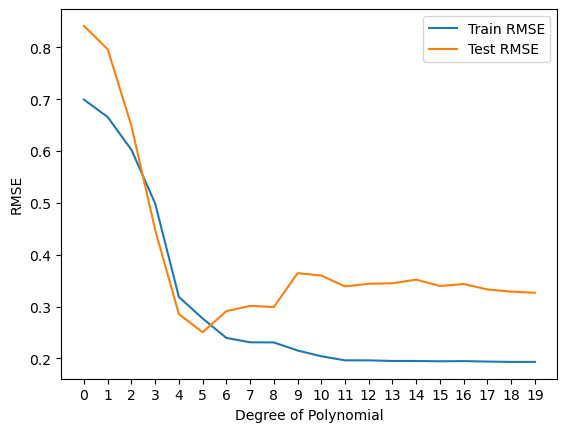

In [545]:
# TODO: plot RMSEs against polynomial degree
import matplotlib.ticker as ticker

plt.plot(range(20), train_rmse, label='Train RMSE')
plt.plot(range(20), test_rmse, label='Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(range(20))
plt.legend()
plt.show()

From the two curves of the previously generated figure you can determine the fit of the models.

- Underfitting: train- and test RMSE are high
- Overfitting: train RMSE is low, test RMSE is high
- Just right: train- and test RMSE are low

### Task 10
List briefly:
- which models underfit
- which models overfit 

In [546]:
# TODO: when does it overfit, underfit?
# Underfitting: 0, 1, 2, 3
# Just right: 4, 5, 6
# Overfitting: 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 